In [ ]:
import sqlite3

# 1) Set up the database.

# Create a connection to an SQLite database file named student_grades.db. If the
# database file does not exist, SQLite will automatically create it.
connection = sqlite3.connect('student_grades.db')

# Create a cursor object to interact with the database.
cursor = connection.cursor()

In [ ]:
# 2) Create the necessary tables.

# Create the student table.
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

# Create the grades table.
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students (student_id)
)
''')

connection.commit()

In [ ]:
# 3) Insert data into the tables.

# Insert at least 5 students into the students table.

data_students = [
    ('Dean', 'Paler'),
    ('Danella', 'Romera'),
    ('Carina', 'Martinez'),
    ('Christine', 'Amor'),
    ('Olivia', 'Cordero')
]

cursor.executemany('''
INSERT INTO students (first_name, last_name)
VALUES (?, ?)
''', data_students)

# Insert at least 3 grades for each student into the grades table.

data_grades = [
    (1, 'Math', 90),
    (1, 'English', 85),
    (1, 'History', 78),
    (2, 'Math', 95),
    (2, 'English', 77),
    (2, 'History', 99),
    (3, 'Math', 88),
    (3, 'English', 91),
    (3, 'History', 97),
    (4, 'Math', 80),
    (4, 'English', 85),
    (4, 'History', 89),
    (5, 'Math', 91),
    (5, 'English', 96),
    (5, 'History', 82)
]

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade)
VALUES (?, ?, ?)
''', data_grades)

connection.commit()

In [ ]:
# 4) Perform SQL queries.

# Retrieve all students' names and their grades.
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

rows = cursor.fetchall()
print("All students' names and their grades:")
for row in rows:
    print(row)

# Find the average grade for each student.
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')

rows = cursor.fetchall()
print("Average grade for each student:")
for row in rows:
    print(row)

# Find the student with the highest average grade.
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY average_grade DESC
LIMIT 1;
''')

rows = cursor.fetchall()
print("Student with the highest average grade:")
for row in rows:
    print(row)


# Find the average grade for the Math subject.
cursor.execute('''
SELECT AVG(grades.grade) AS average_math_grade
FROM grades
WHERE grades.subject = 'Math'
''')

rows = cursor.fetchall()
print("Average grade for the Math subject:")
for row in rows:
    print(row)

# List all students who scored above 90 in any subject.
cursor.execute('''
SELECT students.first_name, students.last_name
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
GROUP BY students.student_id
''')

rows = cursor.fetchall()
print("Students who scored above 90 in any subject:")
for row in rows:
    print(row)

connection.commit()

All students' names and their grades:
('Dean', 'Paler', 'Math', 90)
('Dean', 'Paler', 'English', 85)
('Dean', 'Paler', 'History', 78)
('Danella', 'Romera', 'Math', 95)
('Danella', 'Romera', 'English', 77)
('Danella', 'Romera', 'History', 99)
('Carina', 'Martinez', 'Math', 88)
('Carina', 'Martinez', 'English', 91)
('Carina', 'Martinez', 'History', 97)
('Christine', 'Amor', 'Math', 80)
('Christine', 'Amor', 'English', 85)
('Christine', 'Amor', 'History', 89)
('Olivia', 'Cordero', 'Math', 91)
('Olivia', 'Cordero', 'English', 96)
('Olivia', 'Cordero', 'History', 82)
Average grade for each student:
('Dean', 'Paler', 84.33333333333333)
('Danella', 'Romera', 90.33333333333333)
('Carina', 'Martinez', 92.0)
('Christine', 'Amor', 84.66666666666667)
('Olivia', 'Cordero', 89.66666666666667)
Student with the highest average grade:
('Carina', 'Martinez', 92.0)
Average grade for the Math subject:
(88.8,)
Students who scored above 90 in any subject:
('Danella', 'Romera')
('Carina', 'Martinez')
('Olivi

   first_name last_name  subject  grade
0        Dean     Paler     Math     90
1        Dean     Paler  English     85
2        Dean     Paler  History     78
3     Danella    Romera     Math     95
4     Danella    Romera  English     77
5     Danella    Romera  History     99
6      Carina  Martinez     Math     88
7      Carina  Martinez  English     91
8      Carina  Martinez  History     97
9   Christine      Amor     Math     80
10  Christine      Amor  English     85
11  Christine      Amor  History     89
12     Olivia   Cordero     Math     91
13     Olivia   Cordero  English     96
14     Olivia   Cordero  History     82


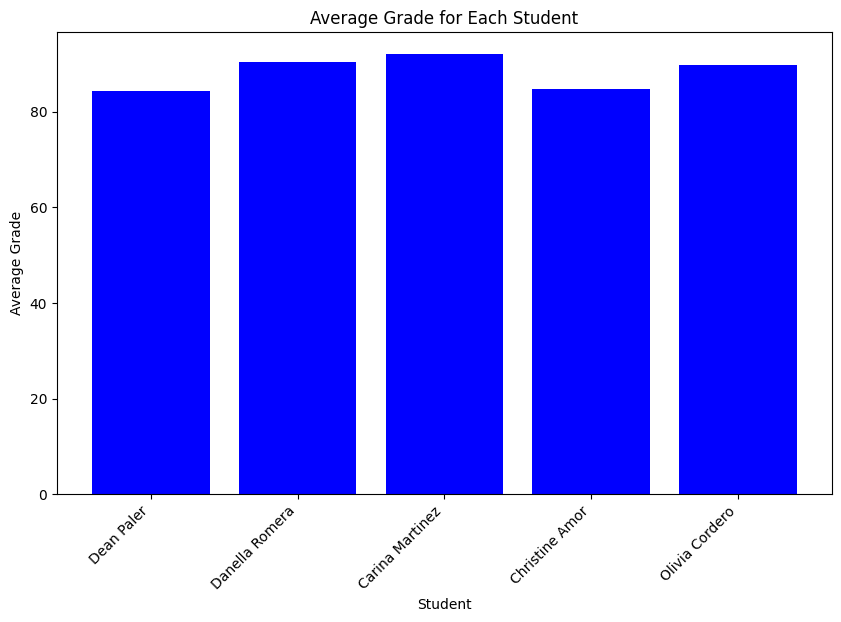

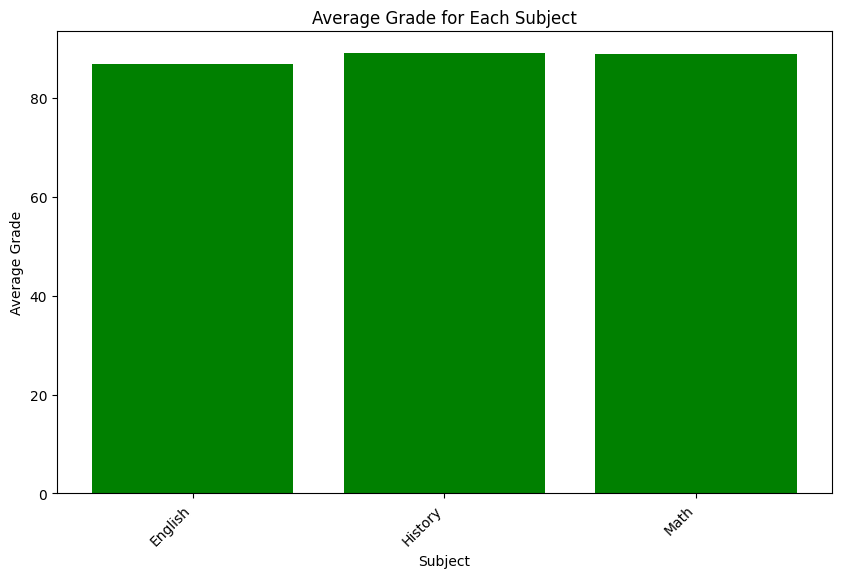

In [ ]:
# 5) Load data into pandas

# Use Pandas to load the data from the students and grades tables into DataFrames.
import pandas as pd

students_df = pd.read_sql_query("SELECT * FROM students", connection)
grades_df = pd.read_sql_query("SELECT * FROM grades", connection)

# Use JOIN queries to combine the data from both tables into a single DataFrame that
# includes each student's name, subject, and grade.
join = '''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
'''

final_df = pd.read_sql_query(join, connection)

print(final_df)

# Visualize the data with Matplotlib

# Plot the average grades for each student

import matplotlib.pyplot as plt

students_avg = '''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id;
'''

df_students_avg = pd.read_sql_query(students_avg, connection)

plt.figure(figsize = (10,6))
plt.bar(df_students_avg['first_name'] + ' ' + df_students_avg['last_name'], df_students_avg['average_grade'], color = 'blue')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Student')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

# Create a bar chart showing the average grade for each subject.

sub_avg = '''
SELECT grades.subject, AVG(grades.grade) AS average_grade
FROM grades
GROUP BY grades.subject;
'''

df_sub_avg = pd.read_sql_query(sub_avg, connection)

plt.figure(figsize = (10,6))
plt.bar(df_sub_avg['subject'], df_sub_avg['average_grade'], color = 'green')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

Student with the highest grade in each subject:
('Olivia', 'Cordero', 'English', 96)
('Danella', 'Romera', 'History', 99)
('Danella', 'Romera', 'Math', 95)


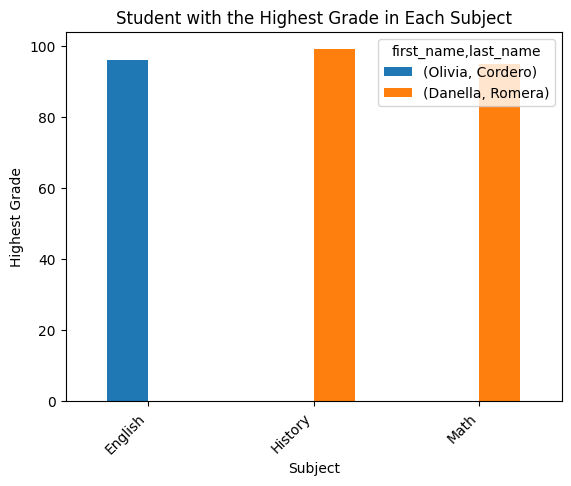

In [ ]:
# 6) Bonus task

# Implement a query that finds the student with the highest grade in each subject.

cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, MAX(grades.grade) AS highest_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY grades.subject
''')

highest_grades_subject = cursor.fetchall()

print("Student with the highest grade in each subject:")
for row in highest_grades_subject:
    print(row)

# Visualize the results using a grouped bar chart.

highest_grades = '''
SELECT students.first_name, students.last_name, grades.subject, MAX(grades.grade) AS highest_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY grades.subject
'''

highest_grades_df = pd.read_sql_query(highest_grades, connection)

highest_grades_df.pivot(index = 'subject', columns = ['first_name', 'last_name'], values = 'highest_grade').plot(kind = 'bar')
plt.xlabel('Subject')
plt.ylabel('Highest Grade')
plt.title('Student with the Highest Grade in Each Subject')
plt.xticks(rotation = 45, ha = 'right')
plt.show()